In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('results.csv', encoding='latin-1')

In [3]:
data

,Maths,Science,Buddhism,Sinhala,History,English,Option 1,Option 2,Option 3,Result
0,A,A,A,A,A,A,A,A,A,Maths
1,A,A,A,A,A,A,A,A,A,Science
2,A,A,A,A,A,A,A,A,A,Commerce
3,A,A,A,A,A,A,A,A,A,Art
4,A,A,A,A,A,A,A,A,B,Maths
...,...,...,...,...,...,...,...,...,...,...
125,S,A,B,C,S,A,B,C,S,Art
126,A,S,S,S,S,S,C,C,C,Art
127,B,C,S,S,S,S,S,C,S,Art
128,S,S,S,S,NaN,S,C,C,C,Art


<Axes: >

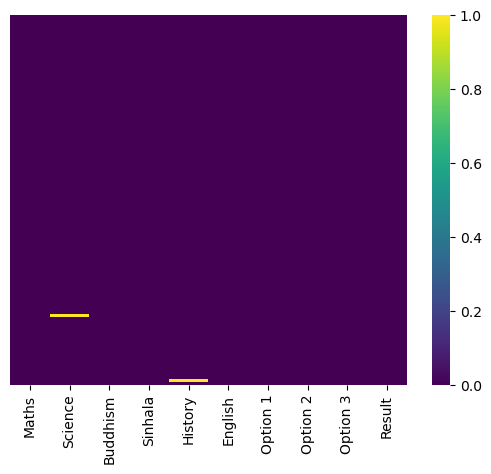

In [4]:
sns.heatmap(data.isnull(),yticklabels=False, cmap="viridis")

In [5]:
data.fillna("S", inplace = True)

<Axes: >

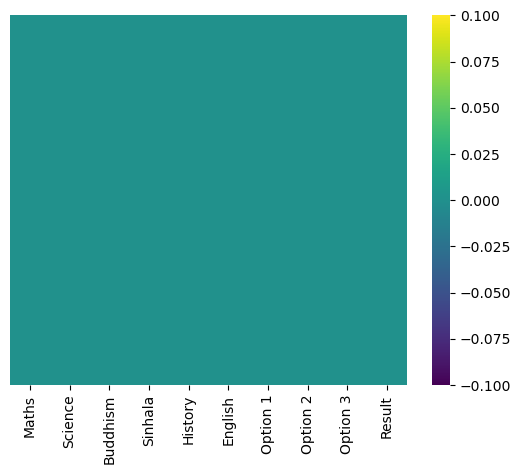

In [6]:
sns.heatmap(data.isnull(),yticklabels=False, cmap="viridis")

In [7]:
data['Maths'].value_counts()

A    46
B    44
C    23
S    17
Name: Maths, dtype: int64

In [10]:
def subject_result(value):
    if value=="A":
        res=1
    elif value=="B":
        res=2
    elif value=="C":
        res=3
    else:
        res=4
        
    return res

In [11]:
data['Maths'] = data['Maths'].apply(subject_result)
data['Science'] = data['Science'].apply(subject_result)
data['Buddhism'] = data['Buddhism'].apply(subject_result)
data['Sinhala'] = data['Sinhala'].apply(subject_result)
data['History'] = data['History'].apply(subject_result)
data['English'] = data['English'].apply(subject_result)
data['Option 1'] = data['Option 1'].apply(subject_result)
data['Option 2'] = data['Option 2'].apply(subject_result)
data['Option 3'] = data['Option 3'].apply(subject_result)

In [12]:
data

,Maths,Science,Buddhism,Sinhala,History,English,Option 1,Option 2,Option 3,Result
0,1,1,1,1,1,1,1,1,1,Maths
1,1,1,1,1,1,1,1,1,1,Science
2,1,1,1,1,1,1,1,1,1,Commerce
3,1,1,1,1,1,1,1,1,1,Art
4,1,1,1,1,1,1,1,1,2,Maths
...,...,...,...,...,...,...,...,...,...,...
125,4,1,2,3,4,1,2,3,4,Art
126,1,4,4,4,4,4,3,3,3,Art
127,2,3,4,4,4,4,4,3,4,Art
128,4,4,4,4,4,4,3,3,3,Art


In [13]:
data['Result'].value_counts()

Art         45
Commerce    38
Science     24
Maths       23
Name: Result, dtype: int64

In [15]:
def set_result(value):
    if value=="Maths":
        res=1
    elif value=="Science":
        res=2
    elif value=="Commerce":
        res=3
    else:
        res=4
        #Art
    return res

In [16]:
data['Result'] = data['Result'].apply(set_result)

In [17]:
data

,Maths,Science,Buddhism,Sinhala,History,English,Option 1,Option 2,Option 3,Result
0,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,1,1,1,3
3,1,1,1,1,1,1,1,1,1,4
4,1,1,1,1,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
125,4,1,2,3,4,1,2,3,4,4
126,1,4,4,4,4,4,3,3,3,4
127,2,3,4,4,4,4,4,3,4,4
128,4,4,4,4,4,4,3,3,3,4


In [19]:
X = data.drop('Result', axis=1)
y = data['Result']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [21]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

LinearRegression() --> -0.12119456113441718
Lasso() --> -0.030346710634262974
DecisionTreeRegressor() --> -1.0063357185450204
RandomForestRegressor() --> -0.6436281684296263


In [23]:
predict=np.round(lr.predict(X_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


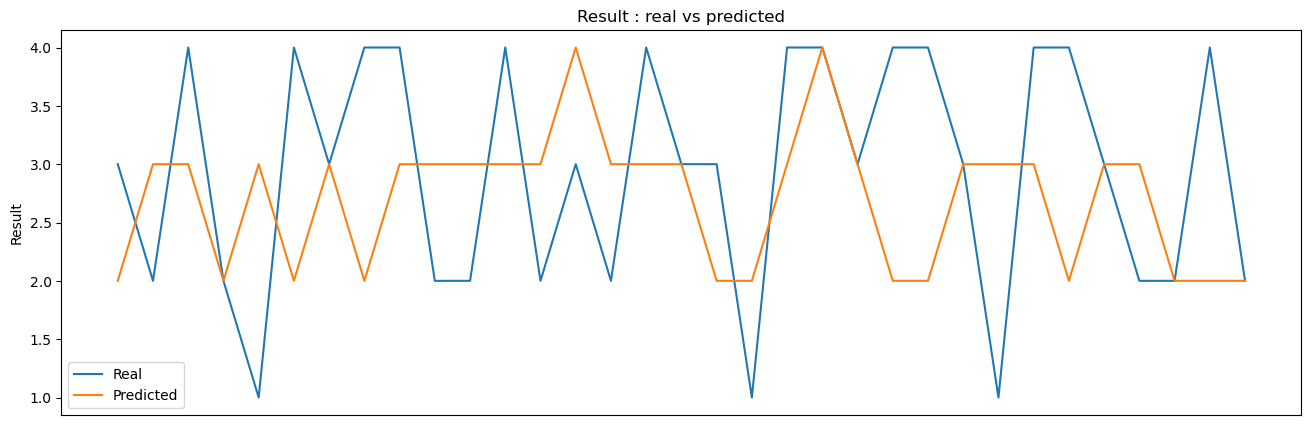

In [24]:
A = np.array(y_test).reshape(-1, 1)
B = predict.reshape(-1, 1)
print(type(predict))
print(type(y_test))
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Result : real vs predicted")
plt.ylabel("Result")
plt.xticks(())
plt.show()

In [25]:
import pickle
# save model to file
pickle.dump(lr, open("chat_result.dat", "wb"))

In [26]:
with open('chat_result.dat' , 'rb') as f:
    model = pickle.load(f)

In [29]:
import math
math.ceil(model.predict([[1,1,2,4,1,1,2,3,1]]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3